

## Step 1: Initializing the COCO API

In [1]:
import os
import sys

from pycocotools.coco import COCO

# initialize COCO API for instance annotations
# path to cocoapi directory
data_dir = r"C:\Users\vedpa\OneDrive\Desktop\sampleProjects\image_captioning\cocoapi"
data_type = "val2014"
instances_ann_file = os.path.join(
    data_dir, "annotations", f"instances_{data_type}.json"
)
coco = COCO(instances_ann_file)

# initialize COCO API for caption annotations
captions_ann_file = os.path.join(data_dir, "annotations", f"captions_{data_type}.json")
coco_caps = COCO(captions_ann_file)

# get image ids
ids = list(coco.anns.keys())

loading annotations into memory...
Done (t=5.23s)
creating index...
index created!
loading annotations into memory...
Done (t=0.24s)
creating index...
index created!


In [2]:
coco.anns

{156: {'segmentation': [[239.97,
    260.24,
    222.04,
    270.49,
    199.84,
    253.41,
    213.5,
    227.79,
    259.62,
    200.46,
    274.13,
    202.17,
    277.55,
    210.71,
    249.37,
    253.41,
    237.41,
    264.51,
    242.54,
    261.95,
    228.87,
    271.34]],
  'area': 2765.1486500000005,
  'iscrowd': 0,
  'image_id': 558840,
  'bbox': [199.84, 200.46, 77.71, 70.88],
  'category_id': 58,
  'id': 156},
 509: {'segmentation': [[247.71,
    354.7,
    253.49,
    346.99,
    276.63,
    337.35,
    312.29,
    333.49,
    364.34,
    331.57,
    354.7,
    327.71,
    369.16,
    325.78,
    376.87,
    333.49,
    383.61,
    330.6,
    379.76,
    321.93,
    365.3,
    320.0,
    356.63,
    317.11,
    266.02,
    331.57,
    260.24,
    334.46,
    260.24,
    337.35,
    242.89,
    338.31,
    234.22,
    338.31,
    234.22,
    348.92,
    239.04,
    353.73,
    248.67,
    355.66,
    252.53,
    353.73]],
  'area': 1545.4213000000007,
  'iscrowd': 0,
 

## Step 2: Plotting a Sample Image

{'license': 4, 'file_name': 'COCO_val2014_000000379259.jpg', 'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000379259.jpg', 'height': 640, 'width': 480, 'date_captured': '2013-11-18 10:23:59', 'flickr_url': 'http://farm7.staticflickr.com/6086/6060470500_00b13c2a4f_z.jpg', 'id': 379259}
http://images.cocodataset.org/val2014/COCO_val2014_000000379259.jpg


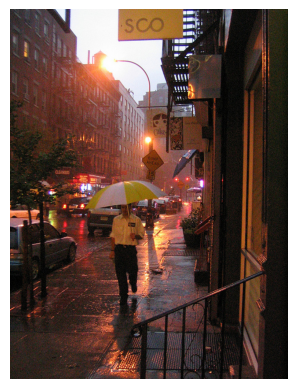

A man with an umbrella walking in the rain
A man is holding an umbrella and walking down the sidewalk in the rain.
A man walks down the street holding an umbrella.
A man walking down a city street holding a yellow and white umbrella.
A man white and yellow umbrella walking in the rain.


In [3]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt

%matplotlib inline

# pick a random image and obtain the corresponding URL
ann_id = np.random.choice(ids)
img_id = coco.anns[ann_id]["image_id"]
img = coco.loadImgs(img_id)[0]
url = img["coco_url"]

print(img)
# print URL and visualize corresponding image
print(url)
I = io.imread(url)
plt.axis("off")
plt.imshow(I)
plt.show()

# load and display captions
ann_ids = coco_caps.getAnnIds(imgIds=img["id"])
anns = coco_caps.loadAnns(ann_ids)
coco_caps.showAnns(anns)